In [320]:
#5.1
import pandas as pd
import numpy as np
train = pd.read_csv('ed-titanic-training.csv', index_col=0)
test = pd.read_csv('ed-titanic-test.csv', index_col=0)
train.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1


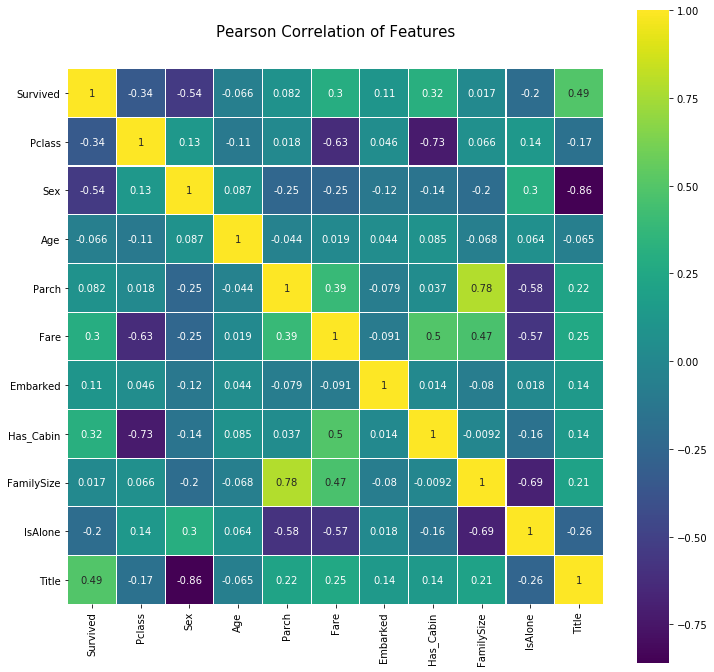

In [321]:
# 5.2
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
g =sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

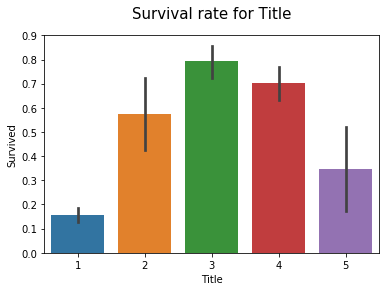

In [322]:
# 5.3
plt.title('Survival rate for Title', y=1.05, size=15)
sns.barplot(x='Title', y='Survived', data=train)

In [323]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]

# Decision Trees

In [324]:
# 5.4
from sklearn.model_selection import cross_val_score
from sklearn import tree
cv_scores_mean = []
cv_scores_std = []
test_depths = range(1,20)
for depth in test_depths:
    tree_model = tree.DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(tree_model, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores_mean.append(cv_scores.mean())
cv_scores_mean = np.array(cv_scores_mean)

Text(0, 0.5, 'Accuracy')

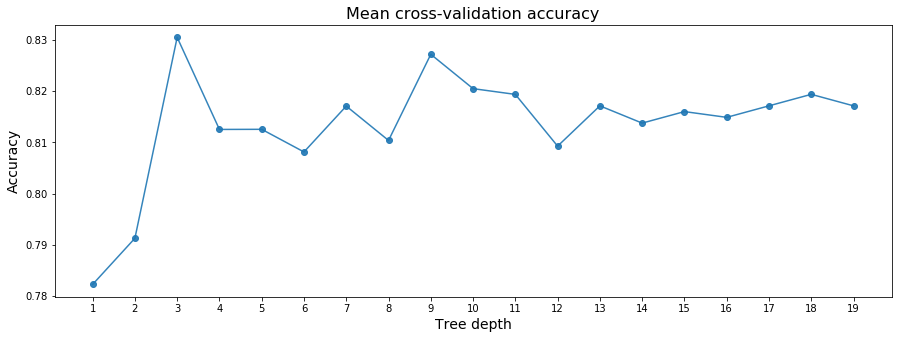

In [325]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(test_depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
ax.set_xticks(test_depths)
ax.set_title("Mean cross-validation accuracy", fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
    

In [326]:
idx_max = cv_scores_mean.argmax()
best_tree_depth = test_depths[idx_max]
best_tree_cv_score = cv_scores_mean[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {}% on training dataset'.format(
      best_tree_depth, round(best_tree_cv_score*100,5)))

The depth-3 tree achieves the best mean cross-validation accuracy 83.05243% on training dataset


In [327]:
# 5.5
decision_tree = tree.DecisionTreeClassifier(max_depth = best_tree_depth, criterion='entropy')
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [328]:
# 5.6
y_pred = decision_tree.predict(test)
np.savetxt('predictions.txt', y_pred, delimiter=",")

Text(0.5, 1.0, 'Decision trees visualization')

<Figure size 432x288 with 0 Axes>

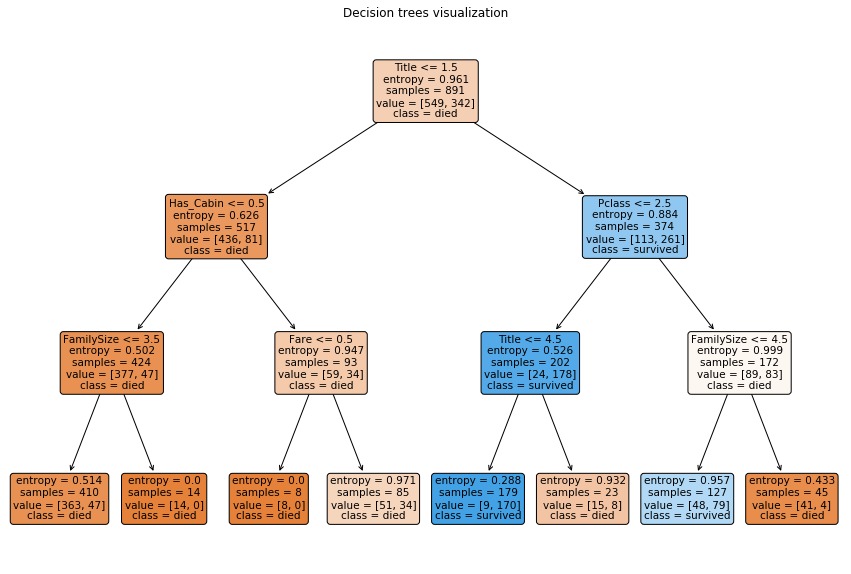

In [329]:
# 5.7
plt.figure()
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree, filled=True, rounded=True, feature_names=list(x_train.columns), class_names=['died','survived'])
plt.title("Decision trees visualization")


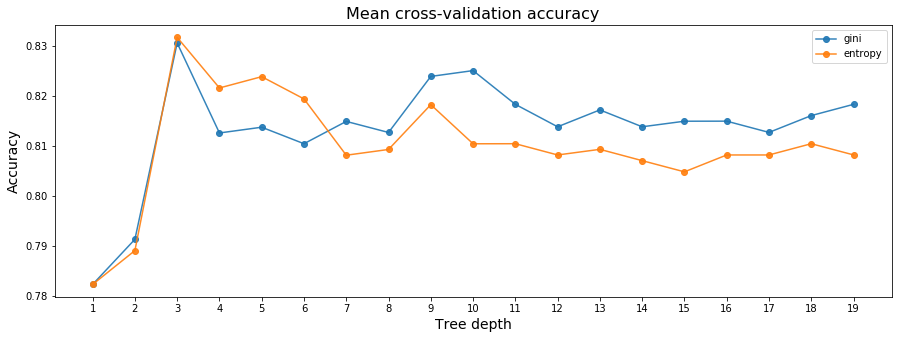

In [330]:
# 5.8
from sklearn.model_selection import cross_val_score
from sklearn import tree
cv_scores_mean_entropy = []
cv_scores_mean_gini = []
test_depths = range(1,20)
test_gini = range(1,20)
for depth in test_depths:
    tree_model_entropy = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    tree_model_gini = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    cv_scores_entropy = cross_val_score(tree_model_entropy, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores_gini = cross_val_score(tree_model_gini, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores_mean_entropy.append(cv_scores_entropy.mean())
    cv_scores_mean_gini.append(cv_scores_gini.mean())
cv_scores_mean_entropy = np.array(cv_scores_mean_entropy)
cv_scores_mean_gini = np.array(cv_scores_mean_gini)

fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(test_depths, cv_scores_mean_gini, '-o', label='gini', alpha=0.9)
ax.plot(test_depths, cv_scores_mean_entropy, '-o', label='entropy', alpha=0.9)
ax.set_xticks(test_depths)
ax.set_title("Mean cross-validation accuracy", fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend()
    

Text(0.5, 1.0, 'Decision trees visualization - gini')

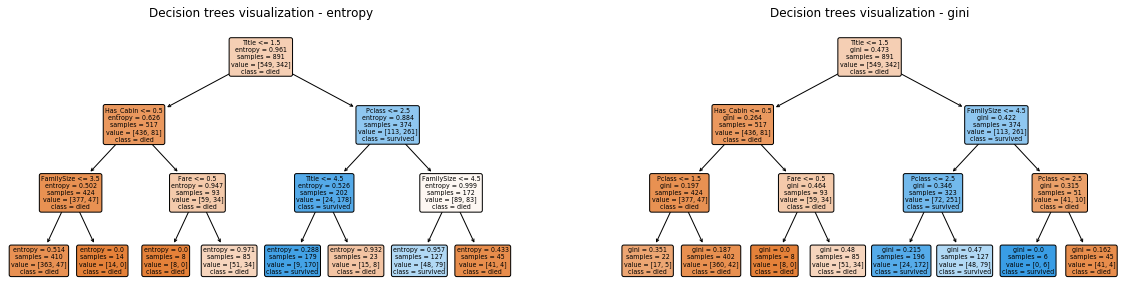

In [331]:
tree_model_entropy = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
tree_model_entropy.fit(x_train, y_train)
tree_model_gini = tree.DecisionTreeClassifier(max_depth=3, criterion='gini')
tree_model_gini.fit(x_train, y_train)
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
tree.plot_tree(tree_model_entropy, filled=True, rounded=True, feature_names=list(x_train.columns), class_names=['died','survived'])
plt.title("Decision trees visualization - entropy")
plt.subplot(1, 2, 2)
tree.plot_tree(tree_model_gini, filled=True, rounded=True, feature_names=list(x_train.columns), class_names=['died','survived'])
plt.title("Decision trees visualization - gini")

Text(0, 0.5, 'Accuracy')

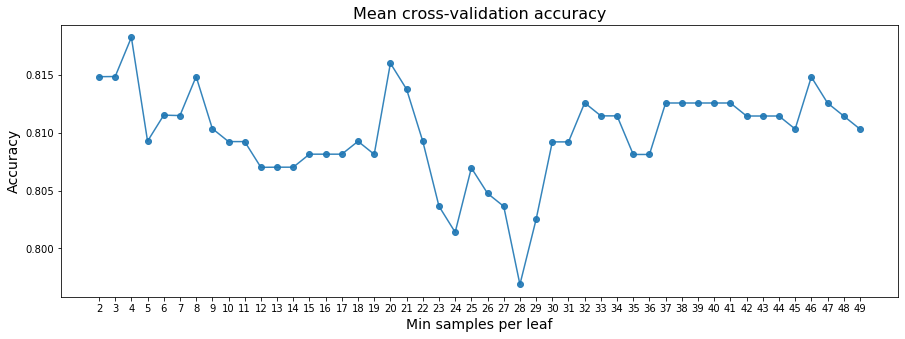

In [332]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
cv_scores_mean = []
cv_scores_std = []
test_min_samples = range(2,50)
for min_samples in test_min_samples:
    tree_model = tree.DecisionTreeClassifier(min_samples_leaf=min_samples)
    cv_scores = cross_val_score(tree_model, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores_mean.append(cv_scores.mean())
cv_scores_mean = np.array(cv_scores_mean)


fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(test_min_samples, cv_scores_mean, '-o', label='samples', alpha=0.9)
ax.set_xticks(test_min_samples)
ax.set_title("Mean cross-validation accuracy", fontsize=16)
ax.set_xlabel('Min samples per leaf', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

In [333]:
# 5.9
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25)

In [334]:
decision_tree = tree.DecisionTreeClassifier(max_depth = best_tree_depth, criterion='entropy')
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

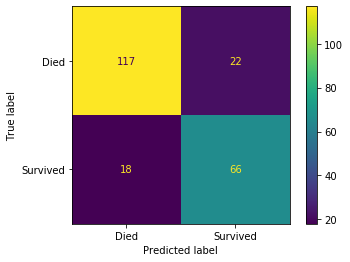

In [335]:
# 5.10
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=decision_tree, X=X_test, y_true=y_test, values_format='.3g', display_labels=['Died', 'Survived'])

In [336]:
# 5.11
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=y_pred)

0.820627802690583

In [337]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test, y_pred=y_pred)

0.7674418604651163

In [338]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_true=y_test, y_score=y_pred)
print('Average precision-recall score: {}'.format(
      average_precision))

Average precision-recall score: 0.670003203074952
